# GOT Episodes IMDb Rating Prediction

![](https://c.wallhere.com/photos/05/11/chess_Game_of_Thrones_A_Song_of_Ice_and_Fire_typography-253057.jpg!d)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing all the required libraries and dataset
5. Data Cleaning
6. Data Visualization
7. Prediction Models
    - Spliting the dataset into 75:25 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression
8. Comparing the accuracy of the models
9. Conclusion

*************************
### Abstract
A Game of Thrones is the first novel in A Song of Ice and Fire, a series of fantasy novels by the American author George R. R. Martin. It was first published on August 1, 1996. The novel won the 1997 Locus Award and was nominated for both the 1997 Nebula Award and the 1997 World Fantasy Award. The novella Blood of the Dragon, comprising the Daenerys Targaryen chapters from the novel, won the 1997 Hugo Award for Best Novella. In January 2011, the novel became a New York Times Bestseller and reached No. 1 on the list in July 2011.

In the novel, recounting events from various points of view, Martin introduces the plot-lines of the noble houses of Westeros, the Wall, and the Targaryens. The novel has inspired several spin-off works, including several games. It is also the namesake and basis for the first season of Game of Thrones, an HBO television series that premiered in April 2011. A March 2013 paperback TV tie-in re-edition was also titled Game of Thrones, excluding the indefinite article "A".


### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/bakar31/game-of-thronesgot

### Goal
The goal of this project is to create a prediction model which will predict the IMDb ratings of the episodes of the Game of Thrones series depending on the views and season of the GOT.

### Importing all the required libraries and Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
df=pd.read_csv("game of thrones.csv")

In [3]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No. overall             73 non-null     int64  
 1   No. in season           73 non-null     int64  
 2   Season                  73 non-null     int64  
 3   Title                   73 non-null     object 
 4   Directed by             73 non-null     object 
 5   Written by              73 non-null     object 
 6   Novel(s) adapted        73 non-null     object 
 7   Original air date       61 non-null     object 
 8   U.S. viewers(millions)  70 non-null     float64
 9   Imdb rating             73 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.8+ KB


In [5]:
df.shape

(73, 10)

### Data Cleaning

In [6]:
df.isnull().sum()

No. overall                0
No. in season              0
Season                     0
Title                      0
Directed by                0
Written by                 0
Novel(s) adapted           0
Original air date         12
U.S. viewers(millions)     3
Imdb rating                0
dtype: int64

In [7]:
df[df['U.S. viewers(millions)'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
26,27,7,3,"""The Bear and the Maiden Fair""",Michelle MacLaren,George R. R. Martin,A Storm of Swords,NaN,NaN,8.7
38,39,9,4,"""The Watchers on the Wall""",Neil Marshall,David Benioff & D. B. Weiss,A Storm of Swords,8-Jun-14,NaN,9.6
55,56,6,6,"""Blood of My Blood""",Jack Bender,Bryan Cogman,Outline from The Winds of Winter and original ...,19-May-16,NaN,8.4


In [8]:
df[df['Original air date'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
6,7,7,1,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,NaN,2.40,9.2
11,12,2,2,"""The Night Lands""",Alan Taylor,David Benioff & D. B. Weiss,A Clash of Kings,NaN,3.76,8.5
12,13,3,2,"""What Is Dead May Never Die""",Alik Sakharov,Bryan Cogman,A Clash of Kings,NaN,3.77,8.8
16,17,7,2,"""A Man Without Honor""",David Nutter,David Benioff & D. B. Weiss,A Clash of Kings,NaN,3.69,8.9
26,27,7,3,"""The Bear and the Maiden Fair""",Michelle MacLaren,George R. R. Martin,A Storm of Swords,NaN,NaN,8.7
36,37,7,4,"""Mockingbird""",Alik Sakharov,David Benioff & D. B. Weiss,A Storm of Swords,NaN,7.20,9.1
46,47,7,5,"""The Gift""",Miguel Sapochnik,David Benioff & D. B. Weiss,"A Feast for Crows, A Dance with Dragons and or...",NaN,5.40,9.0
47,48,8,5,"""Hardhome""",Miguel Sapochnik,David Benioff & D. B. Weiss,"A Feast for Crows, A Dance with Dragons and or...",NaN,7.01,9.9
54,55,5,6,"""The Door""",Jack Bender,David Benioff & D. B. Weiss,Outline from The Winds of Winter and original ...,NaN,7.89,9.7
60,61,1,7,"""Dragonstone""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,NaN,10.11,8.6


In [9]:
#Filling values in U.S. viewers(millions) column----
df.at[26,['U.S. viewers(millions)']]=4.84
df.at[38,['U.S. viewers(millions)']]=6.95
df.at[55,['U.S. viewers(millions)']]=6.71

In [10]:
df[df['U.S. viewers(millions)'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating


In [11]:
#Filling Values in Original air date column---
df.at[6,['Original air date']]='29-May-11'
df.at[11,['Original air date']]='8-April-12'
df.at[12,['Original air date']]='15-April-12'
df.at[16,['Original air date']]='13-May-12'
df.at[26,['Original air date']]='12-May-13'
df.at[36,['Original air date']]='18-May-14'
df.at[46,['Original air date']]='24-May-15'
df.at[47,['Original air date']]='31-May-15'
df.at[54,['Original air date']]='22-May-16'
df.at[60,['Original air date']]='16-July-17'
df.at[67,['Original air date']]='14-April-19'
df.at[68,['Original air date']]='21-April-19'

In [12]:
df.isnull().sum()

No. overall               0
No. in season             0
Season                    0
Title                     0
Directed by               0
Written by                0
Novel(s) adapted          0
Original air date         0
U.S. viewers(millions)    0
Imdb rating               0
dtype: int64

In [13]:
#Converting dtype object to datetime64[ns] dtype---
df['Original air date']=pd.to_datetime(df['Original air date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No. overall             73 non-null     int64         
 1   No. in season           73 non-null     int64         
 2   Season                  73 non-null     int64         
 3   Title                   73 non-null     object        
 4   Directed by             73 non-null     object        
 5   Written by              73 non-null     object        
 6   Novel(s) adapted        73 non-null     object        
 7   Original air date       73 non-null     datetime64[ns]
 8   U.S. viewers(millions)  73 non-null     float64       
 9   Imdb rating             73 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [15]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


*********************
## Data Visualization using Graphs
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('fivethirtyeight')

**1. IMdB Rating less than or equals to 8**

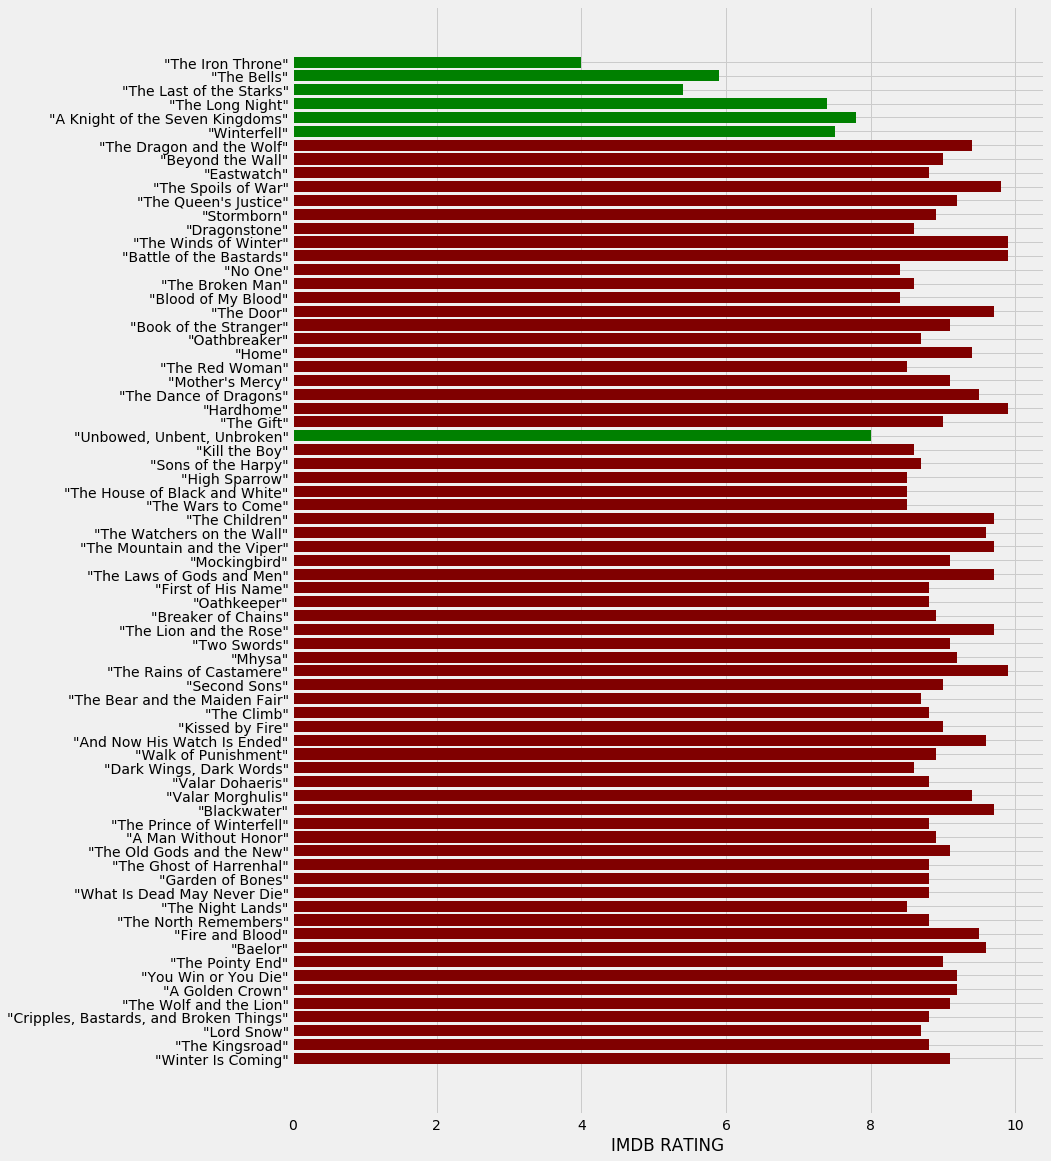

In [17]:
#Imdb rating <=8
plt.gcf().set_size_inches(12,19)
plt.barh(df['Title'],df['Imdb rating'],color=(df['Imdb rating']<=8).map({True:'green',False:'maroon'}))
plt.xlabel('IMDB RATING')
plt.show()

**2. Unique Directors**

In [18]:
df['Directed by'].unique()

array(['Tim Van Patten', 'Brian Kirk', 'Daniel Minahan', 'Alan Taylor',
       'Alik Sakharov', 'David Petrarca', 'David Nutter', 'Neil Marshall',
       'David Benioff', 'Alex Graves', 'Michelle MacLaren', 'D. B. Weiss',
       'Michael Slovis', 'Mark Mylod', 'Jeremy Podeswa',
       'Miguel Sapochnik', 'Daniel Sackheim', 'Jack Bender',
       'Matt Shakman', 'David Benioff & D. B. Weiss'], dtype=object)

**3. The director who directed the most**

In [19]:
#Who directed the most.......
df['Directed by'].max()

'Tim Van Patten'

**4. Unique writters**

In [20]:
df['Written by'].unique()

array(['David Benioff & D. B. Weiss', 'Bryan Cogman',
       'George R. R. Martin', 'Vanessa Taylor', 'Dave Hill'], dtype=object)

**5. Writters who wrote the most**

In [21]:
#Who wrote the most.......
df['Written by'].max()

'Vanessa Taylor'

**6. Unique sources**

In [22]:
df['Novel(s) adapted'].unique()

array(['A Game of Thrones', 'A Clash of Kings', 'A Storm of Swords',
       'A Feast for Crows, A Dance with Dragons and original content',
       'Outline from The Winds of Winter and original content ',
       'Outline from A Dream of Spring and original content '],
      dtype=object)

**7. The famous novel among the writters**

In [23]:
df['Novel(s) adapted'].max()

'Outline from The Winds of Winter and original content '

In [24]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


**8. Plotting the graph based on the views achieved by the show**

<BarContainer object of 73 artists>

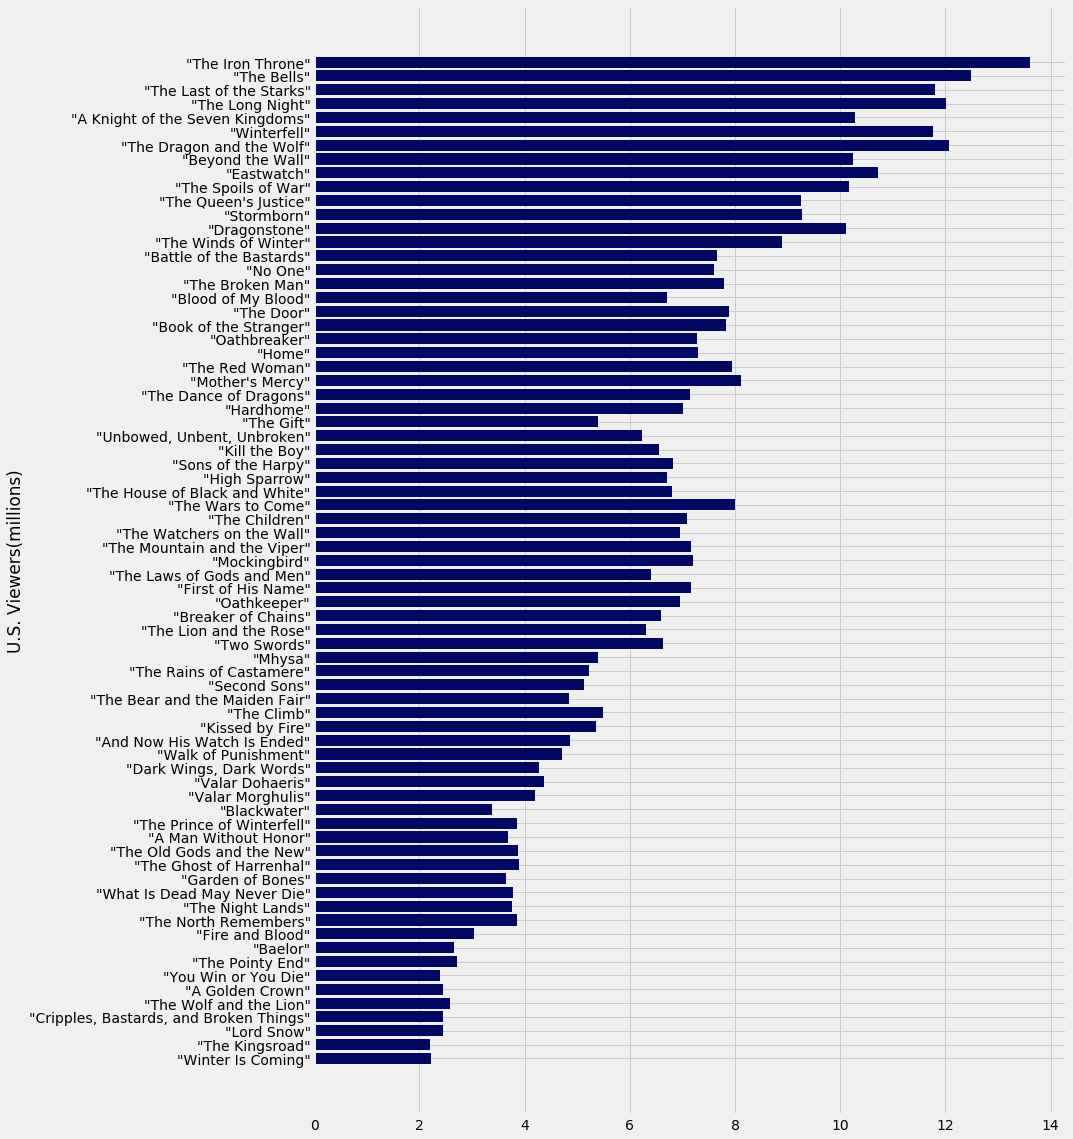

In [25]:
plt.gcf().set_size_inches(12,19)
plt.ylabel("U.S. Viewers(millions)")
plt.barh(df['Title'],df['U.S. viewers(millions)'].values,color='#030764')

**From this graph and from the previous graph we observe that the title which has max viewers has the min IMDB rating....**

*****************************
##   Prediction Model Creation
Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


* **Gradient Boosting Regressor** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **Support Vector Machine Regressor** : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

Let's deploy the models...

**Finding out the correlation among the attributes**

In [26]:
df.corr()

,No. overall,No. in season,Season,U.S. viewers(millions),Imdb rating
No. overall,1.000000,-0.033637,0.990319,0.953693,-0.360508
No. in season,-0.033637,1.000000,-0.168137,-0.109026,0.289966
Season,0.990319,-0.168137,1.000000,0.959563,-0.416212
U.S. viewers(millions),0.953693,-0.109026,0.959563,1.000000,-0.471558
Imdb rating,-0.360508,0.289966,-0.416212,-0.471558,1.000000


In [27]:
x = df[['U.S. viewers(millions)','Season']]

In [28]:
y = df['Imdb rating']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (54, 2)
X_test: (19, 2)
y_train: (54,)
y_test: (19,)


### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regr.predict(X_test)

In [33]:
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

R2-Score: 0.21181232964396102


In [34]:
regr.score(X_test, y_test)

0.21181232964396102

### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred = dtr.predict(X_test)
y_pred

array([9.7, 9.7, 9.6, 8.5, 9. , 9.6, 7.5, 9.7, 9.7, 9.6, 8.5, 8.5, 9.7,
       9.8, 9.6, 9.8, 9. , 7.4, 9.7])

In [38]:
dtr.score(X_test,y_test)

0.13479232728595936

### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = rfr.predict(X_test)
y_pred

array([9.645     , 9.645     , 9.32      , 8.795     , 9.032     ,
       9.334     , 7.468     , 9.645     , 9.569     , 9.38116667,
       8.617     , 8.616     , 9.64      , 9.478     , 9.644     ,
       9.398     , 9.068     , 7.354     , 9.645     ])

In [41]:
rfr.score(X_test,y_test)

0.28534009063840904

### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [42]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [43]:
y_pred = lasso.predict(X_test)
y_pred

array([8.74832365, 8.77769112, 9.09161926, 8.87895826, 9.04098569,
       9.0794672 , 8.3746479 , 8.76553906, 8.84452744, 9.29415354,
       8.89009765, 8.89009765, 8.75946304, 8.54578937, 8.86579353,
       8.53262464, 9.05009973, 8.30578624, 8.77971646])

In [44]:
lasso.score(X_test,y_test)

0.17559486810554192

### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [45]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [46]:
y_pred = ridge.predict(X_test)
y_pred

array([8.63044222, 8.93124074, 9.13108422, 8.9886005 , 8.99226318,
       9.09776717, 8.26678992, 8.89792369, 8.67391988, 9.24580374,
       9.01914113, 9.23942344, 8.66098285, 8.51572271, 8.73222471,
       8.47962924, 9.01725097, 8.07799331, 8.93679358])

In [47]:
ridge.score(X_test,y_test)

0.21178585837216823

### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [48]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[09:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [49]:
y_pred = xgb.predict(X_test)
y_pred

array([9.724829 , 9.724829 , 9.266477 , 8.618946 , 9.185344 , 9.266477 ,
       7.4958453, 9.724829 , 9.594462 , 9.498119 , 8.618946 , 8.618946 ,
       9.724829 , 9.534495 , 9.568957 , 9.371103 , 9.185344 , 7.653713 ,
       9.724829 ], dtype=float32)

In [50]:
xgb.score(X_test,y_test)

0.2066420957374685

### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [51]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor()

In [52]:
y_pred = mlp.predict(X_test)
y_pred

array([ 9.31598012,  9.34282275,  6.45854349,  8.40342384,  6.81257565,
        6.54351121, 12.61438533,  9.4271674 ,  8.41476973,  4.55088169,
        8.32610791,  8.58494888,  9.23809304, 11.18920734,  8.26607622,
       11.2812557 ,  6.74884986, 13.09586908,  9.32876531])

In [53]:
mlp.score(X_test,y_test)

-7.067799423393264

### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
y_pred = gb.predict(X_test)
y_pred

array([9.78683062, 9.74511826, 9.41587984, 8.529248  , 9.16618899,
       9.41587984, 7.48668904, 9.74511826, 9.60827394, 9.50914935,
       8.529248  , 8.529248  , 9.78683062, 9.59786326, 9.5734483 ,
       9.12497754, 9.16618899, 7.82258323, 9.74511826])

In [56]:
gb.score(X_test,y_test)

0.14221956582540007

### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [57]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [58]:
y_pred =svm.predict(X_test)
y_pred

array([9.74835726, 9.45069726, 8.91257001, 9.37269635, 9.01657341,
       8.93561781, 7.68453853, 9.47558643, 9.56549409, 9.00195208,
       9.33451233, 9.14632573, 9.72477304, 8.89169484, 9.49998096,
       8.84790288, 8.99637007, 7.46710186, 9.44633531])

In [59]:
svm.score(X_test,y_test)

0.2536772890346003

********************************
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|0.21|
|Decision Tree Regressor|0.13|
|Random Forest Regressor|0.29|
|Lasso Regression|0.18|
|Ridge Regression|0.21|
|XgBoost Regressor|0.21|
|MLP Regressor|-7.07|
|Gradient Boosting Regressor|0.14|
|Support Vector Regressor|0.25|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Random Forest Regressor is having the upper hand in case of this dataset and after this, we can use Support Vector Machine Regressor which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Random Forest Regressor
2. Support Vector Machine Regression
3. Linear Regression
4. XgBoost
5. Ridge
6. Lasso
7. Gradient Boosting
8. Decision Tree Regression
9. MLP regressor


Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!